In [1]:
import glob,os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import sklearn as sk
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import KFold

plt.rcParams["figure.figsize"] = (5,5)                  #changes width and height respectively
plt.rcParams.update({'font.size': 16})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import csv
import re
import PIL
from PIL import Image
from numpy import asarray

path = "/home/tarak/Ayush/results/rdf/*.dat"
files =glob.glob(path)
for file in sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0])):
    with open(file, 'r') as f:
        with open("x.txt", "a") as f1 ,open("y.txt", "a") as f2:
            data = f.readlines()
            for i in data:
                x = i.split(' ')[0]
                y = i.split(' ')[1]
                f1.write(x + "\n")
                f2.write(y + "\n")

In [12]:
dataframe1 = pd.read_csv(r'/home/tarak/Ayush/results/x.txt', sep =' ',header =None)
dataframe1.columns = ['x']
#dataframe1

In [31]:
dataframe2 = pd.read_csv(r'/home/tarak/Ayush/results/y.txt', sep =' ',header =None)
dataframe2.columns = ['y']
#dataframe2
features = np.loadtxt("/home/tarak/Downloads/input")
dataframe_x = pd.DataFrame(features)

dataframe_x.iloc[39:78,3] =12
dataframe_x.columns = ['Interaction Between Polymer and NP','Interaction Between NP and NP','Size of the NP','Number Density of NP','Chain Length of Polymer']
#dataframe_x.to_csv('input.csv', index=False)

RDF for : 1
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.2
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 0, dtype: float64


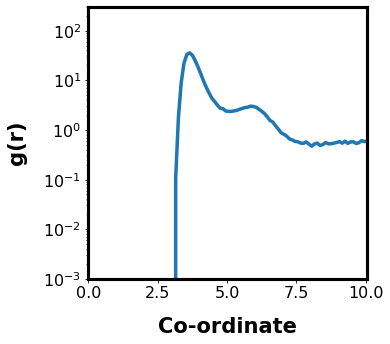

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 2
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.4
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 1, dtype: float64


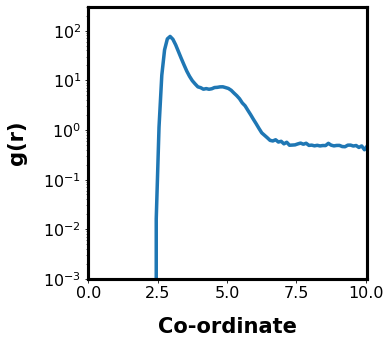

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 3
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.6
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 2, dtype: float64


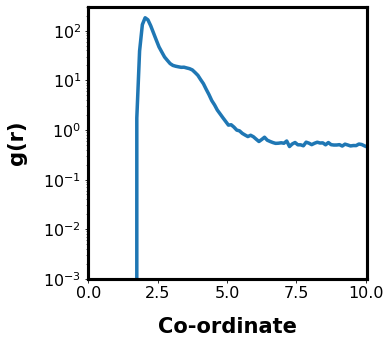

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 4
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.8
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 3, dtype: float64


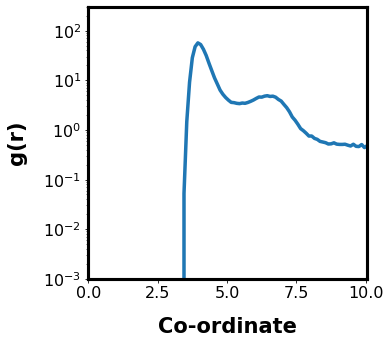

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 5
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          1.0
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 4, dtype: float64


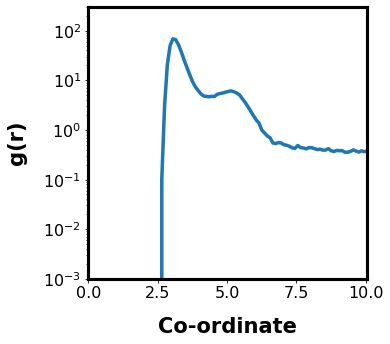

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 6
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.2
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 5, dtype: float64


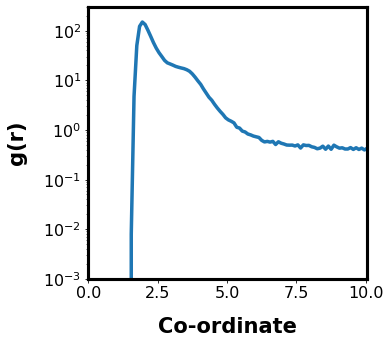

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 7
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.4
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 6, dtype: float64


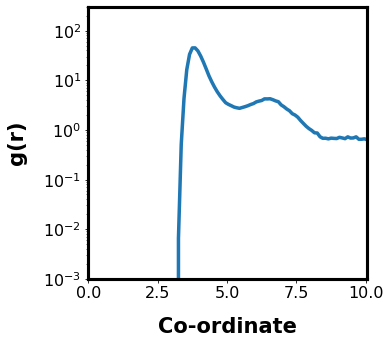

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 8
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.6
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 7, dtype: float64


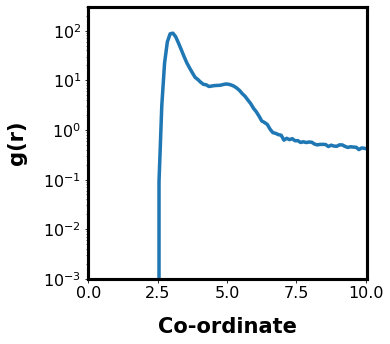

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 9
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.8
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 8, dtype: float64


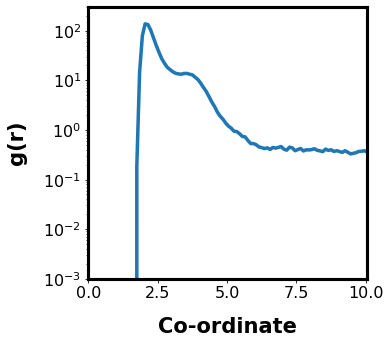

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 10
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          1.0
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 9, dtype: float64


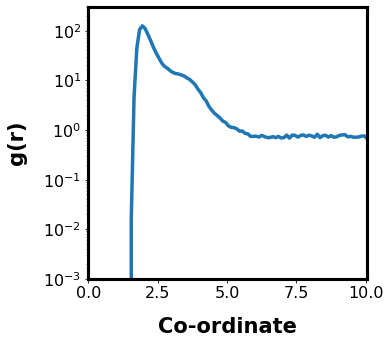

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 11
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.2
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 10, dtype: float64


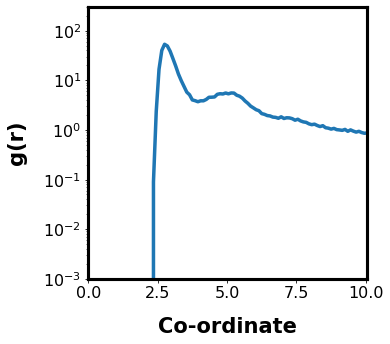

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 12
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.4
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 11, dtype: float64


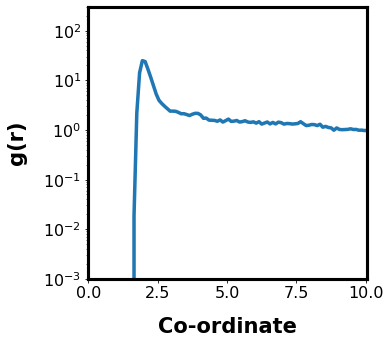

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 13
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.6
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 12, dtype: float64


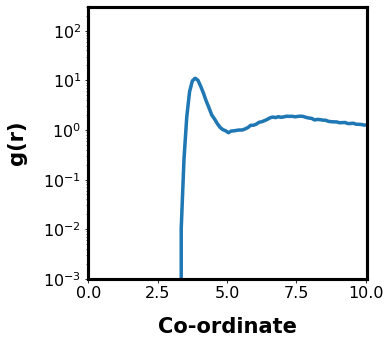

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 14
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.8
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 13, dtype: float64


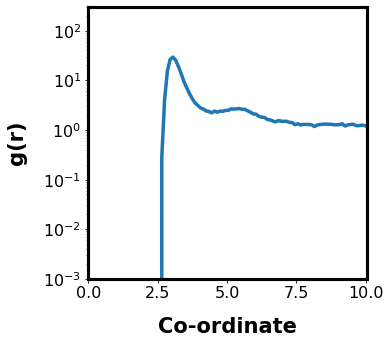

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 15
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          1.0
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 14, dtype: float64


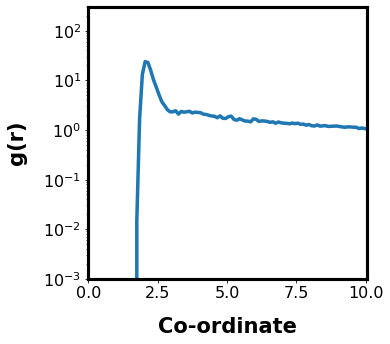

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 16
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.2
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 15, dtype: float64


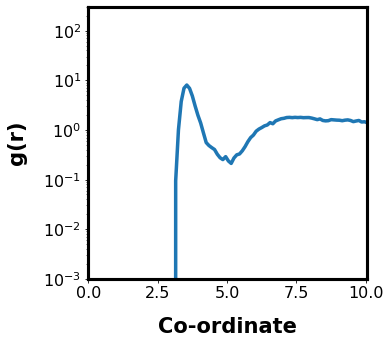

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 17
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.4
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 16, dtype: float64


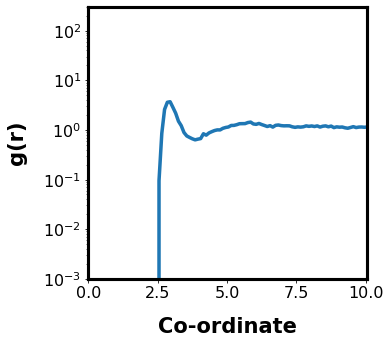

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 18
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.6
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 17, dtype: float64


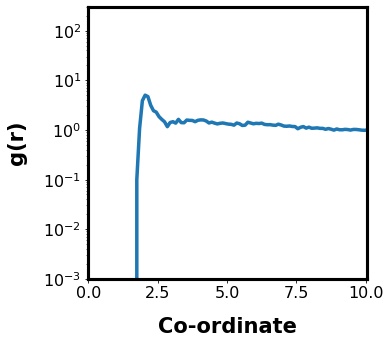

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 19
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.8
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 18, dtype: float64


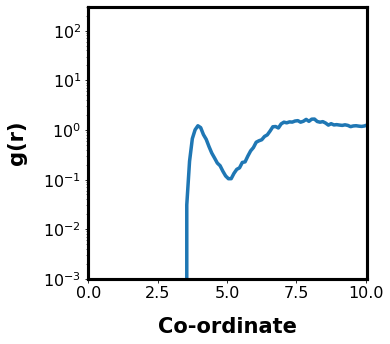

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 20
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          1.0
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 19, dtype: float64


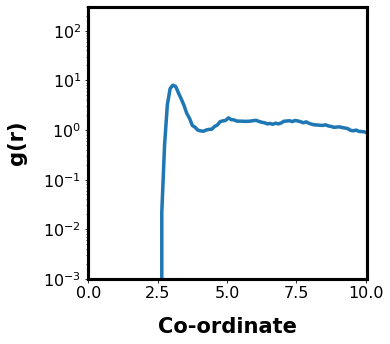

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 21
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.2
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 20, dtype: float64


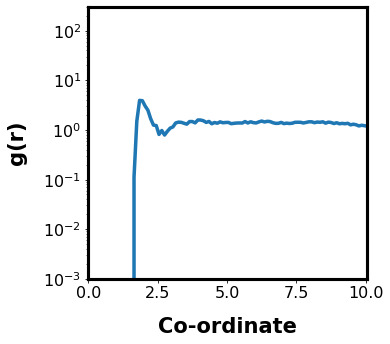

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 22
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.4
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 21, dtype: float64


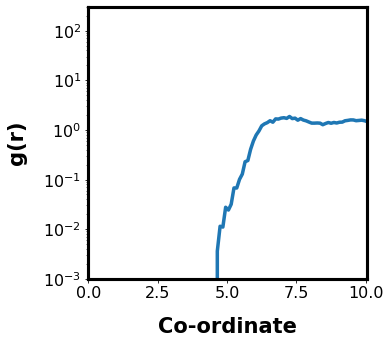

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 23
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.6
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 22, dtype: float64


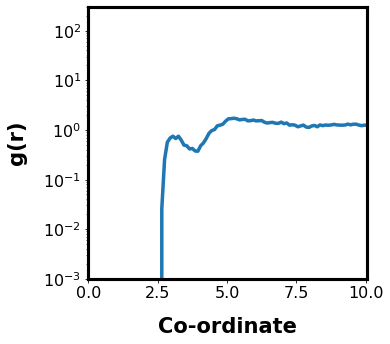

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 24
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.8
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 23, dtype: float64


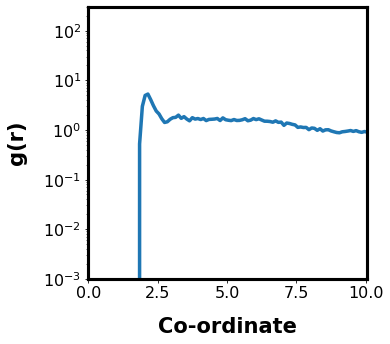

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 25
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          1.0
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 24, dtype: float64


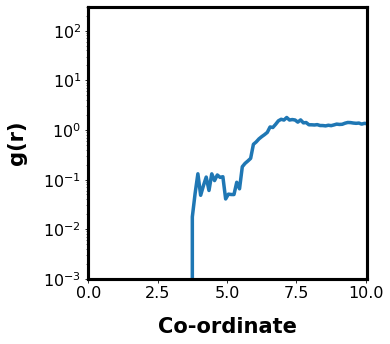

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 26
Interaction Between Polymer and NP     0.1
Interaction Between NP and NP          0.1
Size of the NP                         5.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 25, dtype: float64


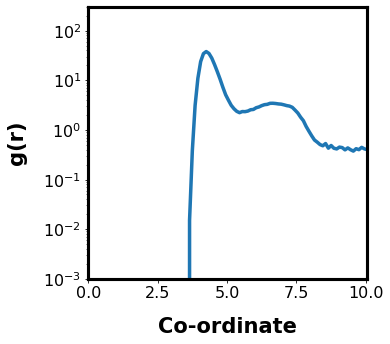

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 27
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.1
Size of the NP                         5.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 26, dtype: float64


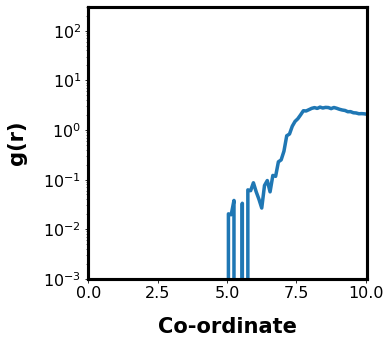

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 28
Interaction Between Polymer and NP     0.05
Interaction Between NP and NP          0.10
Size of the NP                         5.00
Number Density of NP                   8.00
Chain Length of Polymer               30.00
Name: 27, dtype: float64


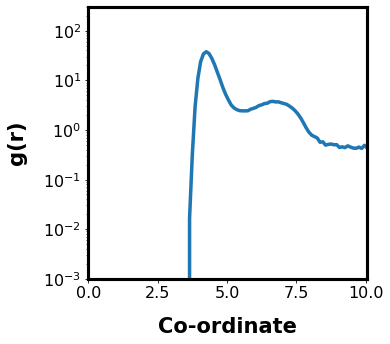

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 29
Interaction Between Polymer and NP     1.5
Interaction Between NP and NP          0.1
Size of the NP                         5.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 28, dtype: float64


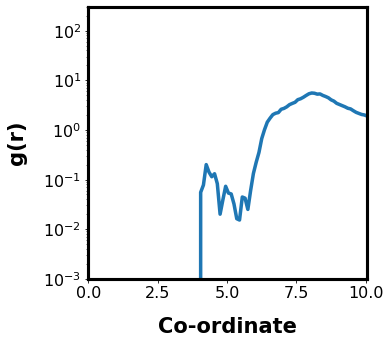

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 30
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          1.5
Size of the NP                         5.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 29, dtype: float64


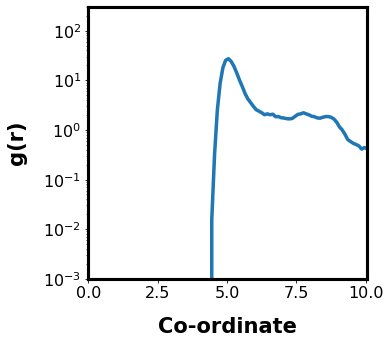

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 31
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          2.0
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 30, dtype: float64


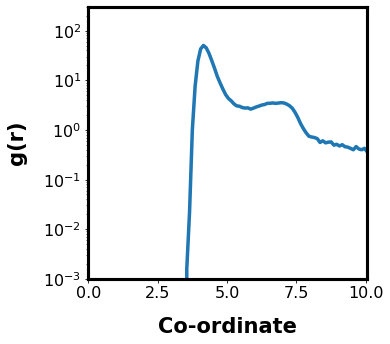

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 32
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          1.5
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 31, dtype: float64


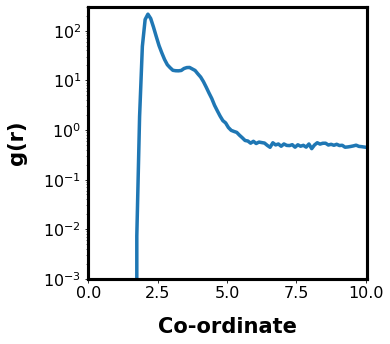

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 33
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          2.0
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 32, dtype: float64


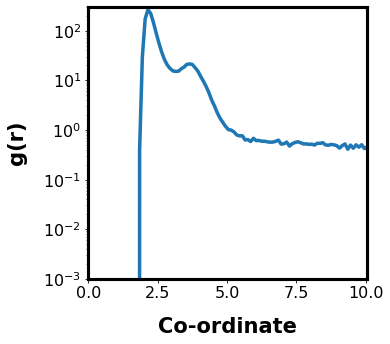

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 34
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          1.5
Size of the NP                         5.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 33, dtype: float64


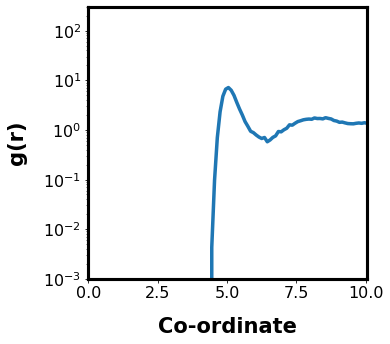

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 35
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          2.0
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 34, dtype: float64


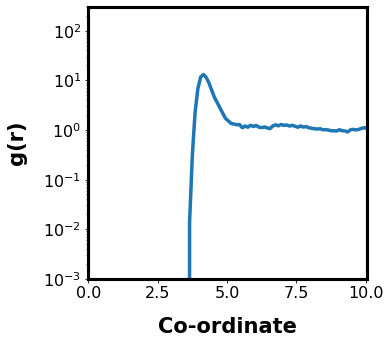

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 36
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          1.5
Size of the NP                         3.0
Number Density of NP                   8.0
Chain Length of Polymer               35.0
Name: 35, dtype: float64


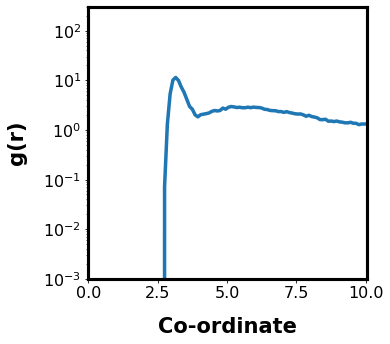

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 37
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          2.5
Size of the NP                         2.0
Number Density of NP                   8.0
Chain Length of Polymer               40.0
Name: 36, dtype: float64


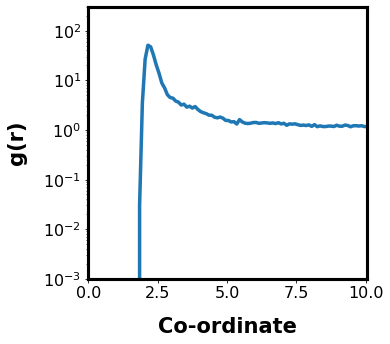

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 38
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          1.5
Size of the NP                         5.0
Number Density of NP                   8.0
Chain Length of Polymer               25.0
Name: 37, dtype: float64


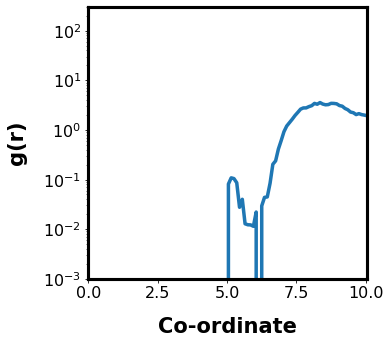

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 39
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          2.5
Size of the NP                         4.0
Number Density of NP                   8.0
Chain Length of Polymer               30.0
Name: 38, dtype: float64


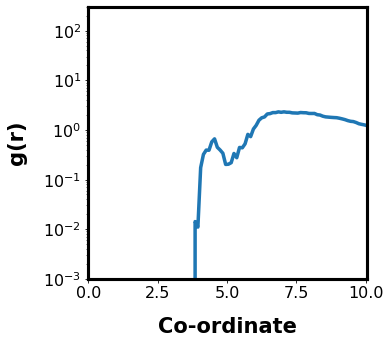

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 40
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.2
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 39, dtype: float64


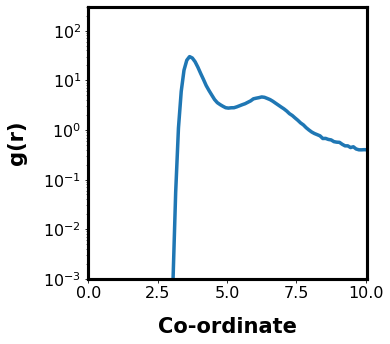

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 41
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.4
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 40, dtype: float64


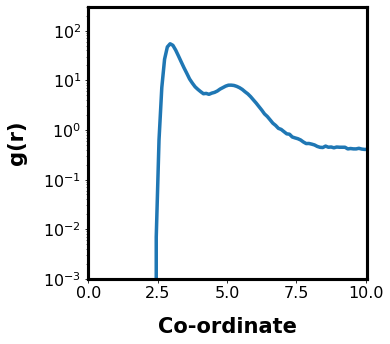

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 42
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.6
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 41, dtype: float64


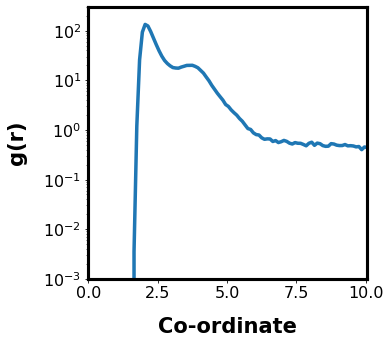

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 43
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          0.8
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 42, dtype: float64


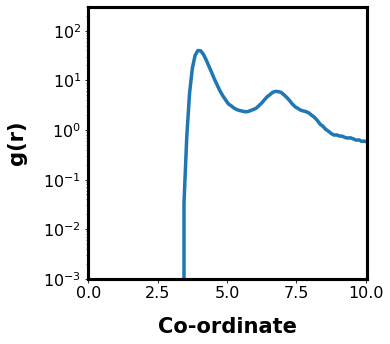

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 44
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          1.0
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 43, dtype: float64


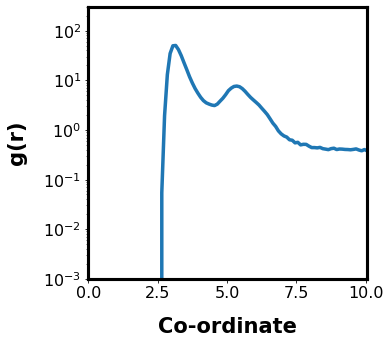

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 45
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.2
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 44, dtype: float64


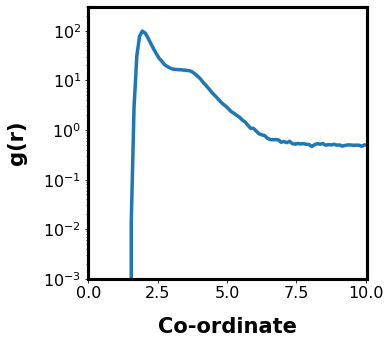

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 46
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.4
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 45, dtype: float64


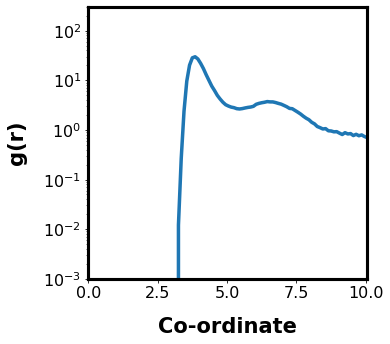

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 47
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.6
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 46, dtype: float64


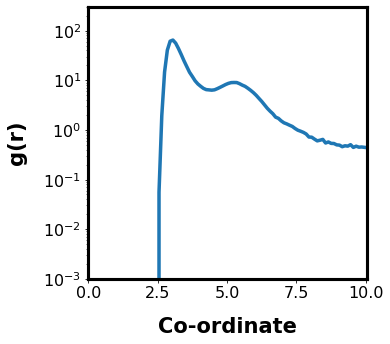

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 48
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          0.8
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 47, dtype: float64


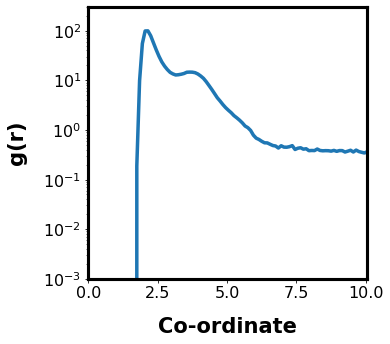

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 49
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          1.0
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 48, dtype: float64


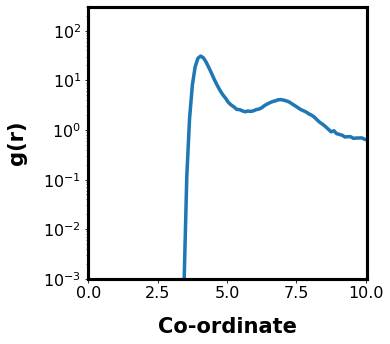

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 50
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.2
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 49, dtype: float64


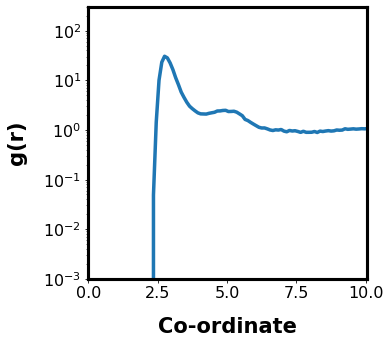

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 51
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.4
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 50, dtype: float64


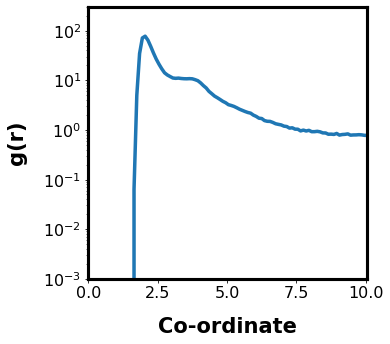

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 52
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.6
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 51, dtype: float64


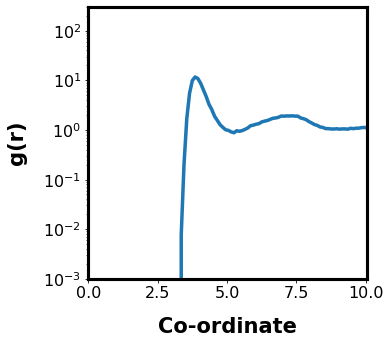

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 53
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          0.8
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 52, dtype: float64


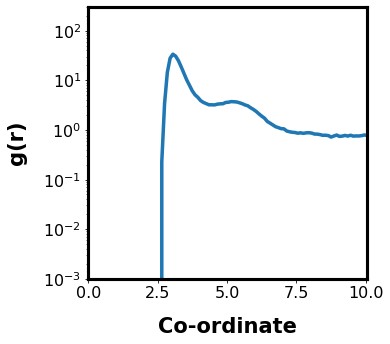

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 54
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          1.0
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 53, dtype: float64


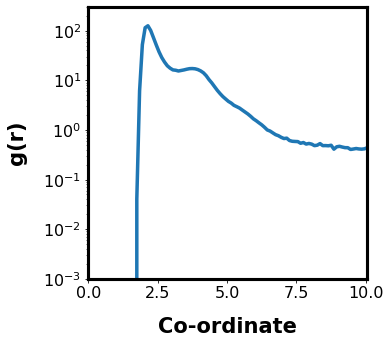

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 55
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.2
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 54, dtype: float64


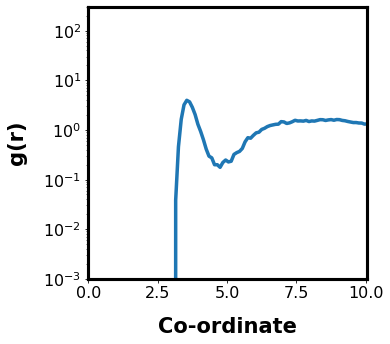

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 56
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.4
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 55, dtype: float64


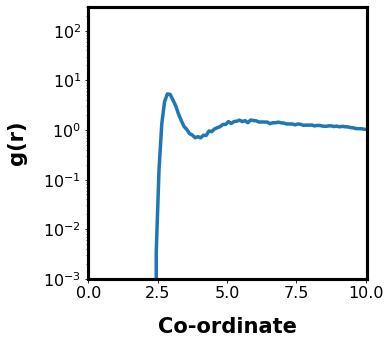

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 57
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.6
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 56, dtype: float64


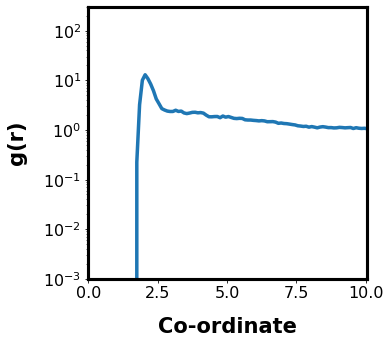

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 58
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          0.8
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 57, dtype: float64


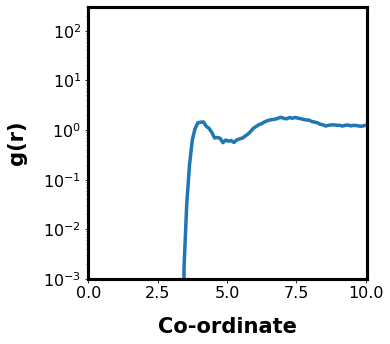

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 59
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          1.0
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 58, dtype: float64


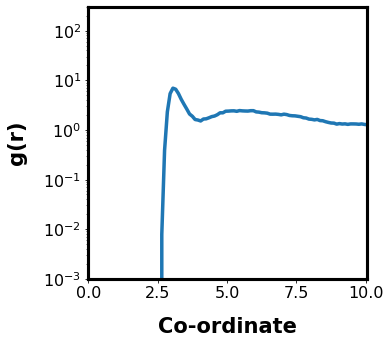

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 60
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.2
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 59, dtype: float64


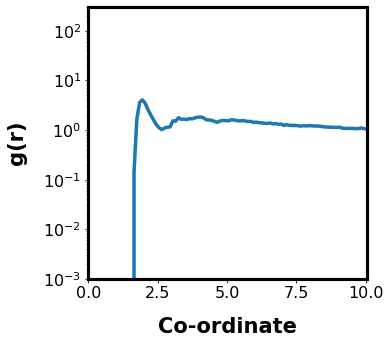

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 61
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.4
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 60, dtype: float64


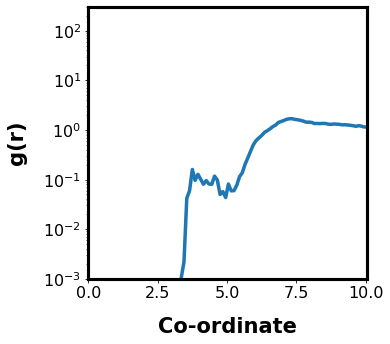

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 62
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.6
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 61, dtype: float64


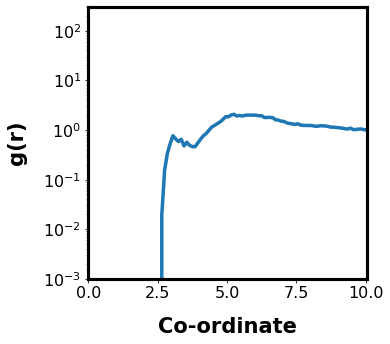

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 63
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.8
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 62, dtype: float64


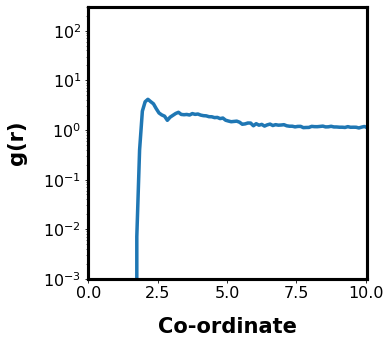

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 64
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          1.0
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 63, dtype: float64


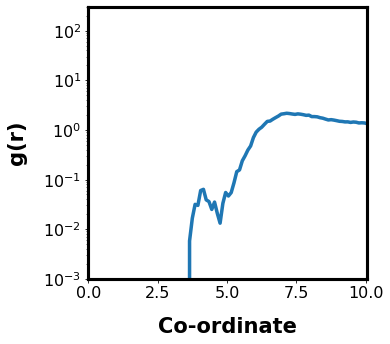

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 65
Interaction Between Polymer and NP     0.1
Interaction Between NP and NP          0.1
Size of the NP                         5.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 64, dtype: float64


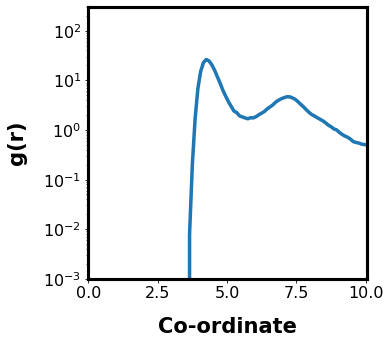

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 66
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          0.1
Size of the NP                         5.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 65, dtype: float64


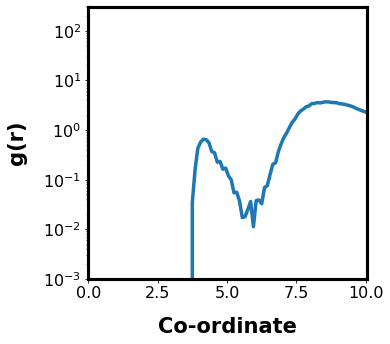

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 67
Interaction Between Polymer and NP     0.05
Interaction Between NP and NP          0.10
Size of the NP                         5.00
Number Density of NP                  12.00
Chain Length of Polymer               30.00
Name: 66, dtype: float64


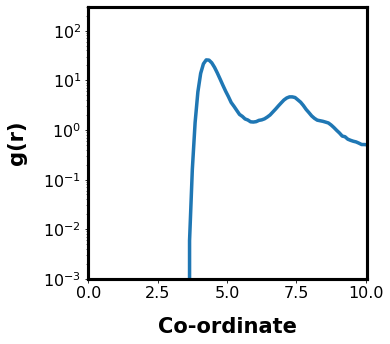

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 68
Interaction Between Polymer and NP     1.5
Interaction Between NP and NP          0.1
Size of the NP                         5.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 67, dtype: float64


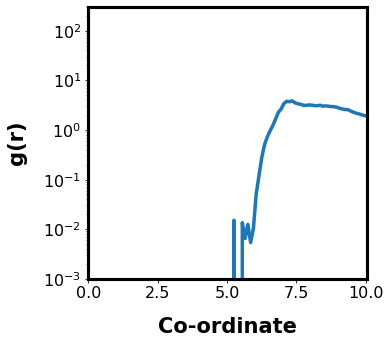

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 69
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          1.5
Size of the NP                         5.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 68, dtype: float64


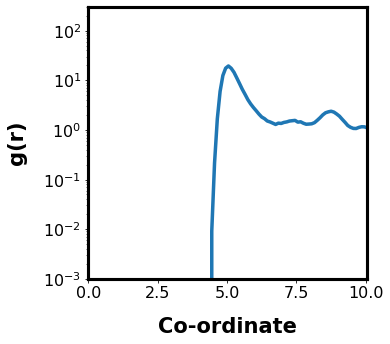

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 70
Interaction Between Polymer and NP     0.2
Interaction Between NP and NP          2.0
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 69, dtype: float64


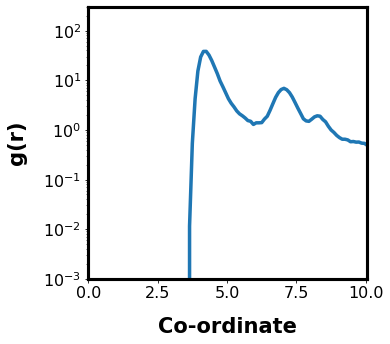

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 71
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          1.5
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 70, dtype: float64


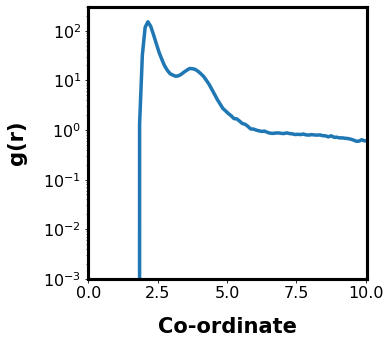

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 72
Interaction Between Polymer and NP     0.4
Interaction Between NP and NP          2.0
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 71, dtype: float64


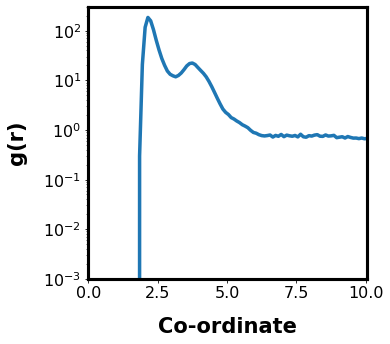

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 73
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          1.5
Size of the NP                         5.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 72, dtype: float64


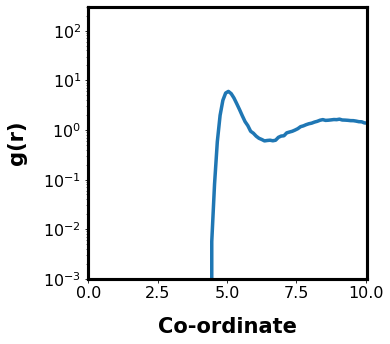

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 74
Interaction Between Polymer and NP     0.6
Interaction Between NP and NP          2.0
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 73, dtype: float64


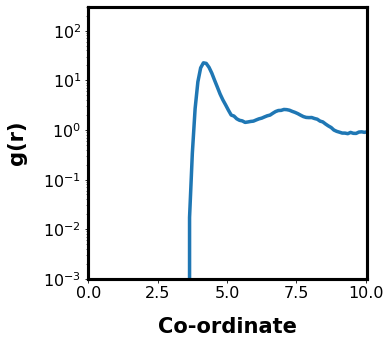

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 75
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          1.5
Size of the NP                         3.0
Number Density of NP                  12.0
Chain Length of Polymer               35.0
Name: 74, dtype: float64


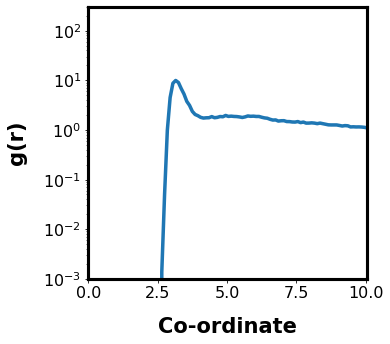

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 76
Interaction Between Polymer and NP     0.8
Interaction Between NP and NP          2.5
Size of the NP                         2.0
Number Density of NP                  12.0
Chain Length of Polymer               40.0
Name: 75, dtype: float64


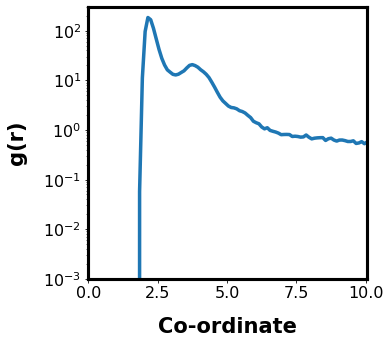

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 77
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          1.5
Size of the NP                         5.0
Number Density of NP                  12.0
Chain Length of Polymer               25.0
Name: 76, dtype: float64


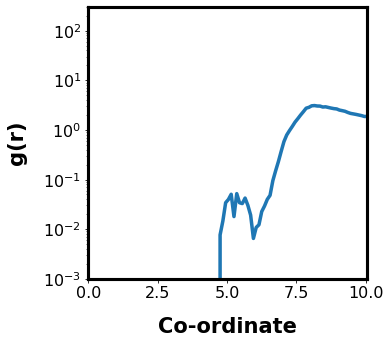

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
RDF for : 78
Interaction Between Polymer and NP     1.0
Interaction Between NP and NP          2.5
Size of the NP                         4.0
Number Density of NP                  12.0
Chain Length of Polymer               30.0
Name: 77, dtype: float64


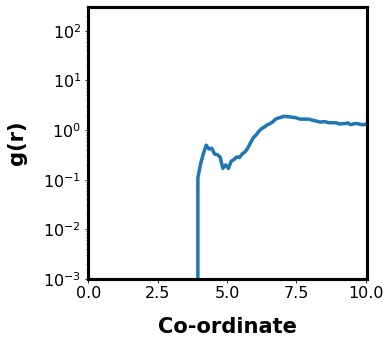

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────


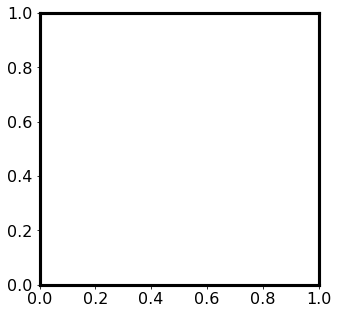

In [42]:
j=101
k=1
plt.rcParams['axes.linewidth'] = 3.1
#plt.style.use("dark_background")
fig, ax = plt.subplots()
#ax.axis("off")
for i in range(0,7878,101): 
        print('RDF for :',k)
        print(dataframe_x.iloc[k-1])
        plt.plot(dataframe1.iloc[i:j,] , dataframe2.iloc[i:j,],linewidth = 3.5)
        #plt.title('RDF')
        plt.xlabel("Co-ordinate",fontweight='bold',fontsize =21,labelpad=16)
        plt.ylabel("g(r)",fontweight='bold',fontsize = 21,labelpad = 16)
    
        ax = plt.gca()
        ax.set_xlim([0, 10.05])
        ax.set_ylim([0.001, 300])
        plt.yscale("log")
        
        #plt.savefig("/home/tarak/Ayush/results/figures/{0}.png".format(k),bbox_inches='tight')
        plt.show()
        fig, ax = plt.subplots()
        #ax.axis("off")
        print('─' * 115)
        print('─' * 115)
       
        k = k+1
        j = j+101  